<a href="https://colab.research.google.com/github/AndresRE23/ecuacion_AG/blob/main/funci%C3%B3n_algGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Población inicial:
Individuo 1: 01000 (x = 8), f(x) = 64
Individuo 2: 00101 (x = 5), f(x) = 25
Individuo 3: 11100 (x = 28), f(x) = 784
Individuo 4: 00111 (x = 7), f(x) = 49
Individuo 5: 10100 (x = 20), f(x) = 400
Individuo 6: 00001 (x = 1), f(x) = 1
Individuo 7: 10110 (x = 22), f(x) = 484
Individuo 8: 11101 (x = 29), f(x) = 841
Individuo 9: 10001 (x = 17), f(x) = 289
Individuo 10: 00101 (x = 5), f(x) = 25

Generación 1:
Mejor individuo: 11101 (x = 29), f(x) = 841
Fitness promedio: 296.2

Generación 2:
Mejor individuo: 11110 (x = 30), f(x) = 900
Fitness promedio: 720.0

Generación 3:
Mejor individuo: 11110 (x = 30), f(x) = 900
Fitness promedio: 795.7

Generación 4:
Mejor individuo: 11110 (x = 30), f(x) = 900
Fitness promedio: 830.2

Generación 5:
Mejor individuo: 11111 (x = 31), f(x) = 961
Fitness promedio: 836.3

Generación 6:
Mejor individuo: 11111 (x = 31), f(x) = 961
Fitness promedio: 836.7

Generación 7:
Mejor individuo: 11111 (x = 31), f(x) = 961
Fitness promedio: 830.6

Generació

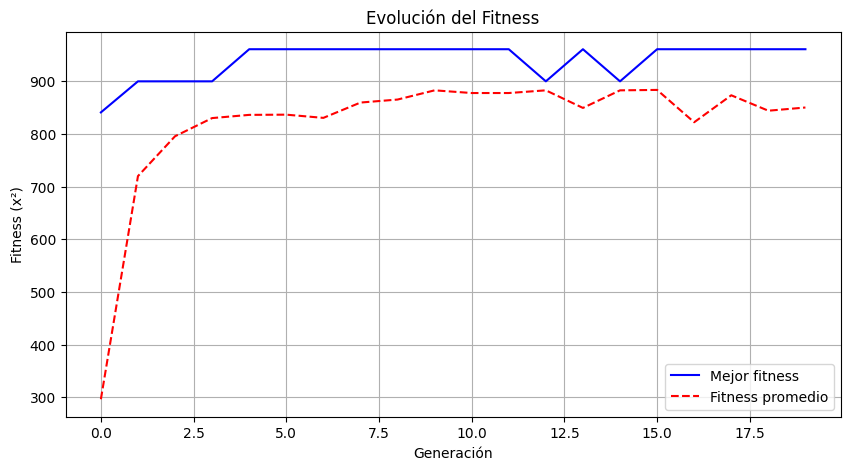


--- RESULTADOS FINALES ---
Mejor solución encontrada: x = 31 (binario: 11111)
Valor de la función: f(31) = 961
Valor máximo posible: f(31) = 961

Evolución del mejor x por generación:
Generación 1: x = 29 (f(x) = 841)
Generación 2: x = 30 (f(x) = 900)
Generación 3: x = 30 (f(x) = 900)
Generación 4: x = 30 (f(x) = 900)
Generación 5: x = 31 (f(x) = 961)
Generación 6: x = 31 (f(x) = 961)
Generación 7: x = 31 (f(x) = 961)
Generación 8: x = 31 (f(x) = 961)
Generación 9: x = 31 (f(x) = 961)
Generación 10: x = 31 (f(x) = 961)
Generación 11: x = 31 (f(x) = 961)
Generación 12: x = 31 (f(x) = 961)
Generación 13: x = 30 (f(x) = 900)
Generación 14: x = 31 (f(x) = 961)
Generación 15: x = 30 (f(x) = 900)
Generación 16: x = 31 (f(x) = 961)
Generación 17: x = 31 (f(x) = 961)
Generación 18: x = 31 (f(x) = 961)
Generación 19: x = 31 (f(x) = 961)
Generación 20: x = 31 (f(x) = 961)

✅ El algoritmo encontró la solución óptima (x = 31)!


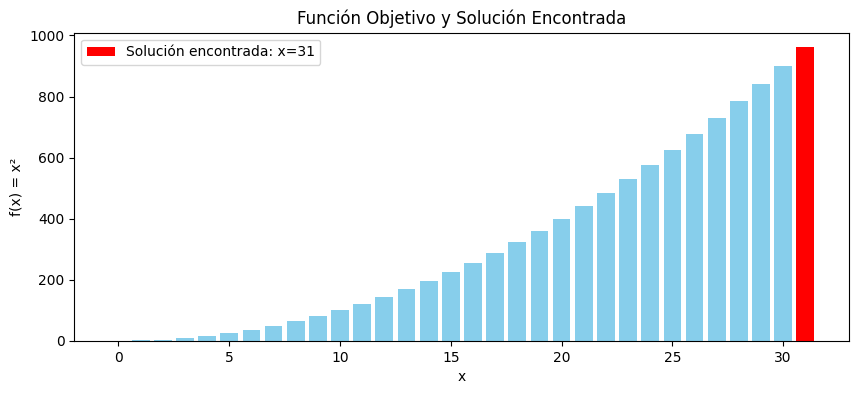

In [8]:

# # Algoritmo Genético Simple: Maximizar f(x) = x²
#
# Este ejemplo implementa un algoritmo genético para encontrar el máximo de la función f(x) = x² en el rango [0, 31].

# ## 1. Configuración Inicial

import random
import matplotlib.pyplot as plt
import numpy as np

# Parámetros del algoritmo genético
DNA_SIZE = 5           # Longitud del ADN en bits (2^5 = 32 valores posibles)
POP_SIZE = 10          # Tamaño de la población
CROSS_RATE = 0.8       # Probabilidad de cruce
MUTATION_RATE = 0.01   # Probabilidad de mutación por bit
N_GENERATIONS = 20     # Número de generaciones
TARGET_FUNCTION = lambda x: x**2  # Función a maximizar

# ## 2. Funciones Auxiliares

def decimal_to_binary(x):
    """Convierte un número decimal a cadena binaria de 5 bits"""
    return bin(x)[2:].zfill(DNA_SIZE)

def binary_to_decimal(binary):
    """Convierte cadena binaria a número decimal"""
    return int(binary, 2)

def get_fitness(pop):
    """Calcula el fitness para toda la población"""
    return np.array([TARGET_FUNCTION(binary_to_decimal(ind)) for ind in pop])

def select(pop, fitness):
    """Selección por ruleta"""
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True, p=fitness/fitness.sum())
    return np.array(pop)[idx]

def crossover(parent1, parent2):
    """Cruza de un punto"""
    if random.random() < CROSS_RATE:
        point = random.randint(1, DNA_SIZE-1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        return child1, child2
    return parent1, parent2

def mutate(child):
    """Mutación bit flip"""
    child = list(child)
    for i in range(DNA_SIZE):
        if random.random() < MUTATION_RATE:
            child[i] = '1' if child[i] == '0' else '0'
    return ''.join(child)

# ## 3. Población Inicial

# Generar población inicial aleatoria
population = [decimal_to_binary(random.randint(0, 31)) for _ in range(POP_SIZE)]

print("Población inicial:")
for i, ind in enumerate(population):
    x = binary_to_decimal(ind)
    print(f"Individuo {i+1}: {ind} (x = {x}), f(x) = {x**2}")

# ## 4. Evolución

# Variables para almacenar el progreso
best_fitness_history = []
avg_fitness_history = []
best_individual_history = []

for generation in range(N_GENERATIONS):
    # Calcular fitness
    fitness = get_fitness(population)

    # Guardar estadísticas
    best_fitness = np.max(fitness)
    avg_fitness = np.mean(fitness)
    best_idx = np.argmax(fitness)
    best_individual = population[best_idx]

    best_fitness_history.append(best_fitness)
    avg_fitness_history.append(avg_fitness)
    best_individual_history.append(binary_to_decimal(best_individual))

    # Selección
    selected = select(population, fitness)

    # Crear nueva generación
    new_population = []
    for i in range(0, POP_SIZE, 2):
        parent1, parent2 = selected[i], selected[i+1]
        child1, child2 = crossover(parent1, parent2)
        new_population.extend([mutate(child1), mutate(child2)])

    population = new_population

    # Mostrar progreso
    print(f"\nGeneración {generation+1}:")
    print(f"Mejor individuo: {best_individual} (x = {binary_to_decimal(best_individual)}), f(x) = {best_fitness}")
    print(f"Fitness promedio: {avg_fitness:.1f}")

# ## 5. Visualización de Resultados

plt.figure(figsize=(10, 5))
plt.plot(best_fitness_history, 'b-', label='Mejor fitness')
plt.plot(avg_fitness_history, 'r--', label='Fitness promedio')
plt.xlabel('Generación')
plt.ylabel('Fitness (x²)')
plt.title('Evolución del Fitness')
plt.legend()
plt.grid(True)
plt.show()

# ## 6. Resultados Finales

best_idx = np.argmax(get_fitness(population))
best_individual = population[best_idx]
best_x = binary_to_decimal(best_individual)
best_fitness = TARGET_FUNCTION(best_x)

print("\n--- RESULTADOS FINALES ---")
print(f"Mejor solución encontrada: x = {best_x} (binario: {best_individual})")
print(f"Valor de la función: f({best_x}) = {best_fitness}")
print(f"Valor máximo posible: f(31) = 961")

print("\nEvolución del mejor x por generación:")
for gen, x in enumerate(best_individual_history):
    print(f"Generación {gen+1}: x = {x} (f(x) = {x**2})")

# ## 7. Análisis de Convergencia

if best_x == 31:
    print("\n✅ El algoritmo encontró la solución óptima (x = 31)!")
else:
    print("\n⚠ El algoritmo no encontró el óptimo global. Prueba aumentar:")
    print("- El número de generaciones")
    print("- La tasa de mutación")
    print("- El tamaño de la población")

# ## 8. Gráfico de la Función Objetivo

# %%
x_values = np.arange(0, 32)
plt.figure(figsize=(10, 4))
plt.bar(x_values, [TARGET_FUNCTION(x) for x in x_values], color='skyblue')
plt.bar(best_x, TARGET_FUNCTION(best_x), color='red', label=f'Solución encontrada: x={best_x}')
plt.xlabel('x')
plt.ylabel('f(x) = x²')
plt.title('Función Objetivo y Solución Encontrada')
plt.legend()
plt.show()